In [6]:
import pandas as pd

In [7]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Oasis Infobyte Internship/Advertising.csv")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**EXPLORATORY DATA ANALYSIS**

In [10]:
# Remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
# Explore and visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

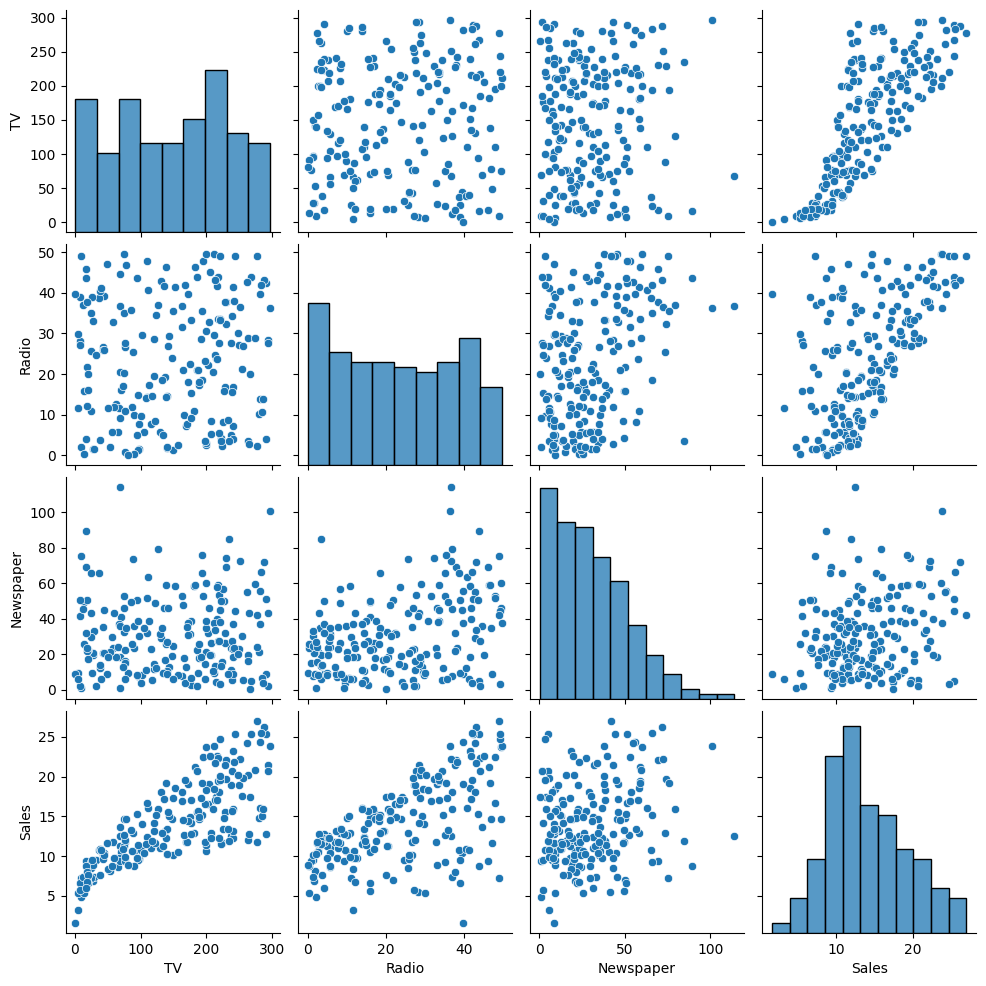

In [16]:
sns.pairplot(df)
plt.show()

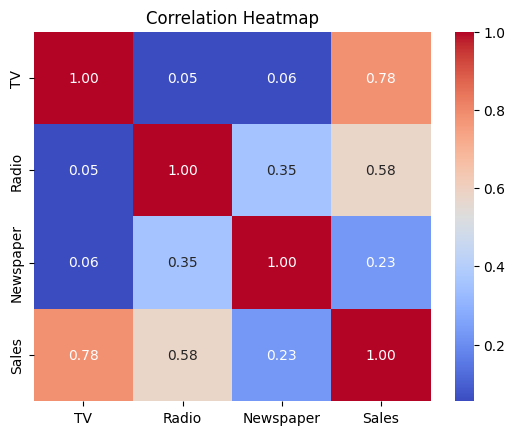

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**FEATURE ENGINEERING**

In [18]:
#Here we are Creating a new feature 'Total_Advertising_Spending'
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

In [19]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Advertising_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model= RandomForestRegressor(random_state=35)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [23]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3298607750000064
R-squared: 0.9578672572732626


**PREDICTION**

In [24]:
import random

# Step 1: Taking random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
pred_data = df[['TV', 'Radio', 'Newspaper']].sample(5)
pred_data

,TV,Radio,Newspaper
194,149.7,35.6,6.0
163,163.5,36.8,7.4
103,187.9,17.2,17.9
89,109.8,47.8,51.4
184,253.8,21.3,30.0


In [25]:
# Step 2: Add the 'Total_Advertising_Spending' column
pred_data['Total_Advertising_Spending'] = pred_data['TV'] + pred_data['Radio'] + pred_data['Newspaper']
pred_data

,TV,Radio,Newspaper,Total_Advertising_Spending
194,149.7,35.6,6.0,191.3
163,163.5,36.8,7.4,207.7
103,187.9,17.2,17.9,223.0
89,109.8,47.8,51.4,209.0
184,253.8,21.3,30.0,305.1


In [26]:
rforest_predictions = model.predict(pred_data)
rforest_predictions

array([16.937, 17.844, 14.918, 17.09 , 17.183])

In [37]:
pred_data['Original Value'] = df.loc[pred_data.index, 'Sales']
pred_data.reset_index(drop=True, inplace=True)  # Resetting the index

predictions_table = pd.DataFrame({
    'Original Value': pred_data['Original Value'],
    'Random Forest Prediction': rforest_predictions,
})

predictions_table

,Original Value,Random Forest Prediction
0,22.1,16.937
1,10.4,17.844
2,9.3,14.918
3,18.5,17.090
4,12.9,17.183


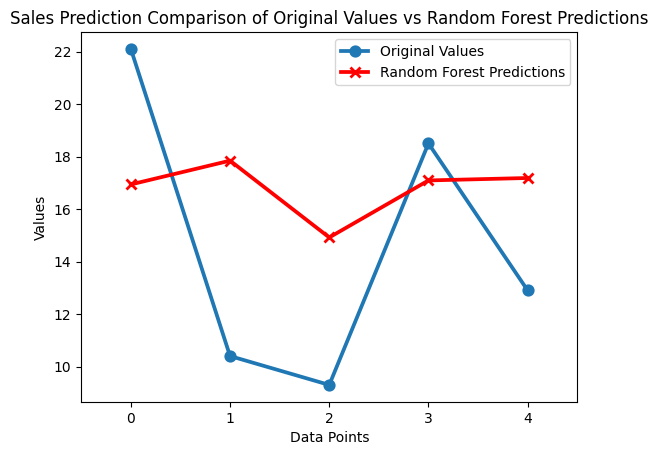

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predictions_table' is already defined
sns.pointplot(x=predictions_table.index, y='Original Value', data=predictions_table, label='Original Values', markers='o')
sns.pointplot(x=predictions_table.index, y='Random Forest Prediction', data=predictions_table, label='Random Forest Predictions', color='red', markers='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Sales Prediction Comparison of Original Values vs Random Forest Predictions')
plt.legend()
plt.show()